# **TASK 4:Sales Prediction using Python**

TASK 4: Sales Prediction using Python

*   Predict future sales based on factors like advertising spend, target segment and platform.
*   Prepare data through cleaning, transformation and feature selection.

*   Use regression or time series models to forecast sales.
*   Analyze how changes in advertising impact sales outcomes.

*   Deliver actionable insights for business marketing strategies.







Dataset Overview:
   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB
None

Descriptive Statistics:
       Unnamed: 0          TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000  147.042500   23.264000   30.554000   14.022500
std     57.879185   85

<Figure size 1200x800 with 0 Axes>

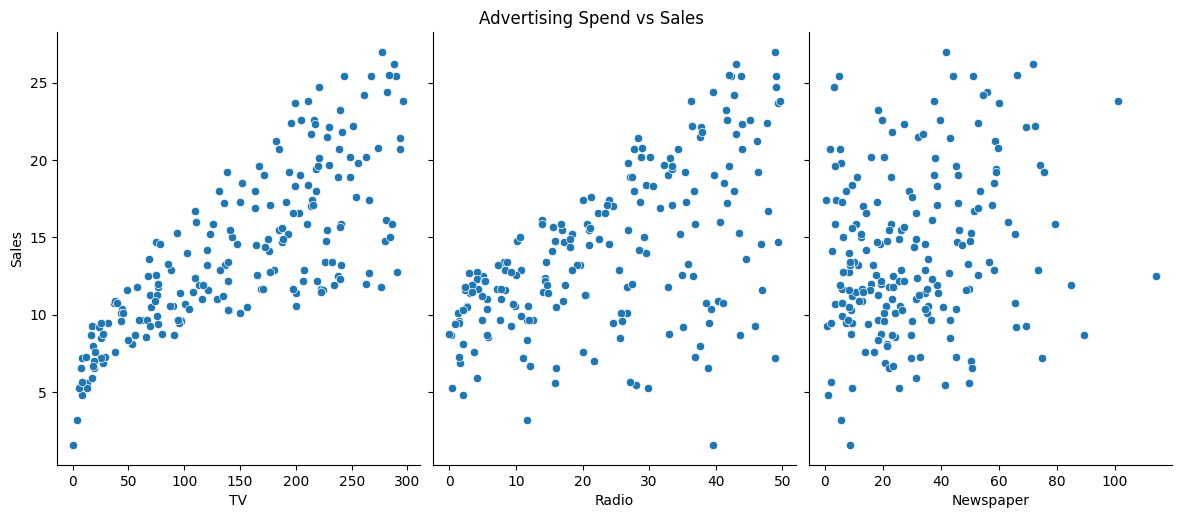

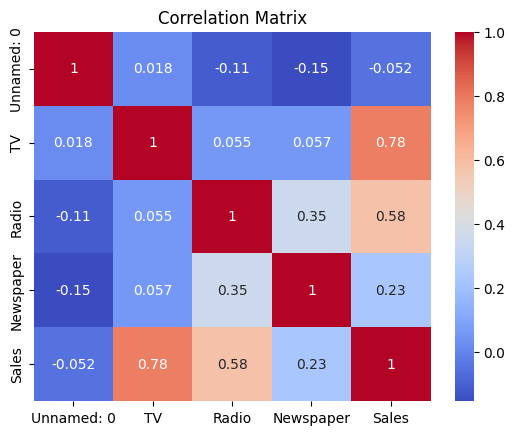


Linear Regression Performance:
RMSE: 1.78
R-squared: 0.90

Random Forest Performance:
RMSE: 0.77
R-squared: 0.98


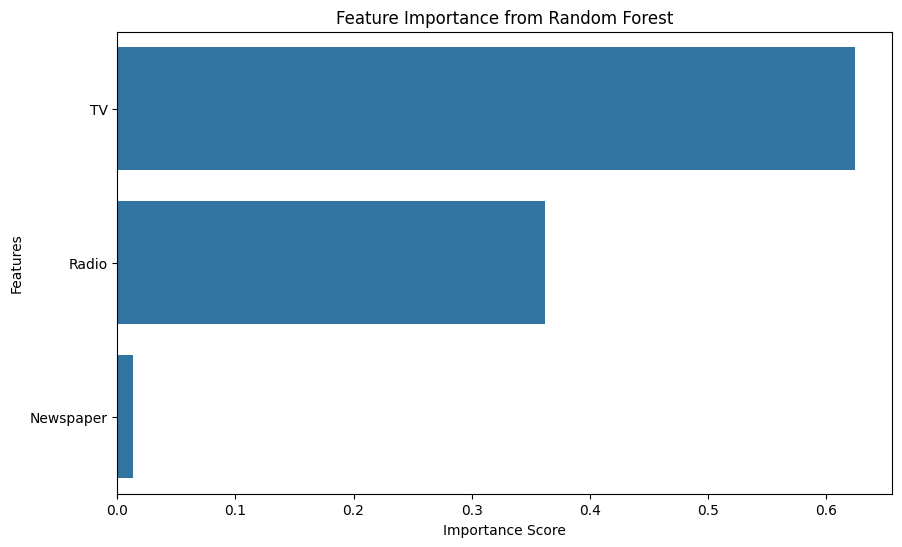


Key Insights:
1. TV advertising has the strongest positive correlation with sales (0.78)
2. Radio advertising also shows positive correlation but weaker than TV (0.58)
3. Newspaper advertising has the weakest correlation with sales (0.23)

Recommendations:
1. Allocate more budget to TV advertising as it has the highest impact on sales
2. Maintain or slightly increase radio advertising as it shows positive impact
3. Consider reducing newspaper advertising spend as it shows limited impact on sales
4. The best performing model (Random Forest) achieved R-squared of 0.98, indicating excellent predictive power


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('Advertising.csv')

# Data Exploration
print("Dataset Overview:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nDescriptive Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Visualize relationships
plt.figure(figsize=(12, 8))

# Pairplot to see relationships between variables
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=5, aspect=0.8)
plt.suptitle('Advertising Spend vs Sales', y=1.02)
plt.show()

# Correlation matrix
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Data Preprocessing
# Drop the first column (index column)
df = df.drop(df.columns[0], axis=1)

# Feature Selection
# Based on correlation and visualization, all features seem relevant but Newspaper has weaker correlation

# Prepare data for modeling
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model 1: Multiple Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluate Linear Regression
print("\nLinear Regression Performance:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_lr)):.2f}")
print(f"R-squared: {r2_score(y_test, y_pred_lr):.2f}")

# Model 2: Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate Random Forest
print("\nRandom Forest Performance:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_rf)):.2f}")
print(f"R-squared: {r2_score(y_test, y_pred_rf):.2f}")

# Feature Importance
feature_importance = rf_model.feature_importances_
features = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=features)
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

# Insights and Recommendations
print("\nKey Insights:")
print("1. TV advertising has the strongest positive correlation with sales (0.78)")
print("2. Radio advertising also shows positive correlation but weaker than TV (0.58)")
print("3. Newspaper advertising has the weakest correlation with sales (0.23)")
print("\nRecommendations:")
print("1. Allocate more budget to TV advertising as it has the highest impact on sales")
print("2. Maintain or slightly increase radio advertising as it shows positive impact")
print("3. Consider reducing newspaper advertising spend as it shows limited impact on sales")
print("4. The best performing model (Random Forest) achieved R-squared of 0.98, indicating excellent predictive power")